In [1]:
## How to know what environment I'm running this script
%echo %VIRTUAL_ENV%

C:/Users/josue/OneDrive/Documents/eDNA Challenges/HotelRevenueManagement/.venv


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [10]:
agents = pd.read_csv('../data/agent_performance.csv', index_col='agent')

In [22]:
agents.columns

Index(['Produced Income', 'Income %', 'Booking Effectiveness %',
       'Booking Volume', 'Volume %', 'Earned Comissions'],
      dtype='object')

In [24]:
agents['Produced Income'].describe()

count    3.330000e+02
mean     9.281731e+04
std      5.984649e+05
min      0.000000e+00
25%      6.459400e+02
50%      3.249750e+03
75%      2.026059e+04
max      9.069805e+06
Name: Produced Income, dtype: float64

In [30]:
print(f" Median {agents['Produced Income'].median()} ,  Mean {agents['Produced Income'].mean().round(2)}")
print("Median is much lower than mean, so distribution is highly right skewed")

 Median 3249.75 ,  Mean 92817.31
Median is much lower than mean, so distribution is highly right skewed


In [31]:
agents.sum()

Produced Income            3.090817e+07
Income %                   8.989000e+01
Booking Effectiveness %    2.689555e+04
Booking Volume             8.619300e+04
Volume %                   9.998100e+01
Earned Comissions          5.907904e+06
dtype: float64

In [25]:
agents['Produced Income']

agent
1       442457.82
240    5278622.81
142     154422.16
103       3751.15
6       391836.34
          ...    
461        645.94
388        478.14
480        145.98
408        110.98
444         93.74
Name: Produced Income, Length: 333, dtype: float64

In [83]:
# As data is heavily right skewed, then we need to generate exponential based segments instead of linear ones
# First step is to verify range of minimum to maximum logvalues according to our data
print(np.log10(agents['Produced Income'].describe()))
# As the lowest non zero income is $41.04 dollars, then we are going to start our scale from there
print(f"Min limit {np.log10(41)}")
print(f"Max limit {np.log10(agents['Produced Income'].max())}")
segments = 10 ** np.arange(1.60, 7.2, 0.1)
print("segments")
print(segments)

count    2.522444
mean     4.967629
std      5.777039
min          -inf
25%      2.810192
50%      3.511850
75%      4.306652
max      6.957598
Name: Produced Income, dtype: float64
Min limit 1.6127838567197355
Max limit 6.957597935023873
segments
[3.98107171e+01 5.01187234e+01 6.30957344e+01 7.94328235e+01
 1.00000000e+02 1.25892541e+02 1.58489319e+02 1.99526231e+02
 2.51188643e+02 3.16227766e+02 3.98107171e+02 5.01187234e+02
 6.30957344e+02 7.94328235e+02 1.00000000e+03 1.25892541e+03
 1.58489319e+03 1.99526231e+03 2.51188643e+03 3.16227766e+03
 3.98107171e+03 5.01187234e+03 6.30957344e+03 7.94328235e+03
 1.00000000e+04 1.25892541e+04 1.58489319e+04 1.99526231e+04
 2.51188643e+04 3.16227766e+04 3.98107171e+04 5.01187234e+04
 6.30957344e+04 7.94328235e+04 1.00000000e+05 1.25892541e+05
 1.58489319e+05 1.99526231e+05 2.51188643e+05 3.16227766e+05
 3.98107171e+05 5.01187234e+05 6.30957344e+05 7.94328235e+05
 1.00000000e+06 1.25892541e+06 1.58489319e+06 1.99526231e+06
 2.51188643e+06 3.16

C:\Users\josue\OneDrive\Documents\eDNA Challenges\HotelRevenueManagement\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


([<matplotlib.axis.XTick at 0x1fb09fd6ab0>,
 [Text(100, 0, '100'),
  Text(1000, 0, '1,000'),
  Text(5000, 0, '5,000'),
  Text(10000, 0, '10,000'),
  Text(20000, 0, '20,000'),
  Text(50000, 0, '50,000'),
  Text(100000, 0, '100,000'),
  Text(500000, 0, '500,000'),
  Text(1000000, 0, '1,000,000'),
  Text(10000000, 0, '10,000,000')])

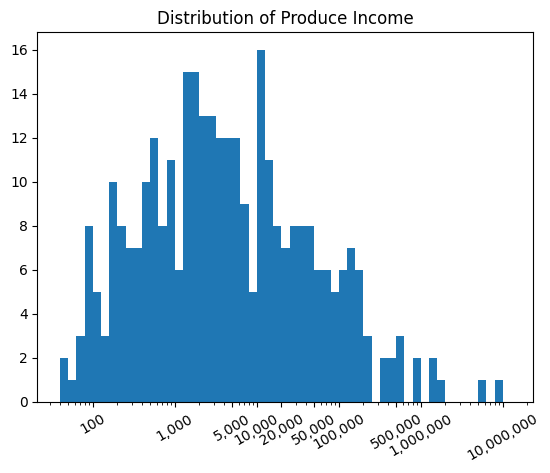

In [98]:
plt.hist(data=agents, x='Produced Income', bins=segments)
plt.title("Distribution of Produce Income")
# Let's add a more interpretable ticks since all values are expressed in exponential numbers
ticks = [100, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 10000000]
labels = ['{:,}'.format(tick) for tick in ticks]
plt.xscale('log')
plt.xticks(ticks, labels, rotation=30)